In [2]:
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time
import json
import string
import re
from collections import Counter
from collections import defaultdict
import operator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import casual, casual_tokenize
from nltk import bigrams

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
consumer_key = 'WxNCHN3AZKIbby85LE0FRn52h'
consumer_secret = 'sWuF83Pianv1Vm9R0txN34DROWFzJGpUZfQz673RytxhRRwEtL'
access_token = '975767174-qFHaY394JvFX8DbgKmq2cSQjsl1Cxhl1AuggDokq'
access_secret = '5eV3SHTA0HU7i7USSwxpspoqSk2sW6Ip7VBXqOgMLxsF9'

In [4]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_secret)
api = tweepy.API(auth)

In [5]:
#Reading Own Timeline
for status in tweepy.Cursor(api.home_timeline).items(2):
    print(status.text)

Arvind Kejriwal is like that guy in college who used to look at every pretty girl and say, "isko bhai patayega tera".
#AI version of the snake game in C++ https://t.co/zf9kEo1jCv https://t.co/5kwX0WcdQN


In [6]:
#Reading own timeline-- JSON
for status in tweepy.Cursor(api.home_timeline).items(1):
    print(status._json)

{'contributors': None, 'in_reply_to_status_id': None, 'text': 'Arvind Kejriwal is like that guy in college who used to look at every pretty girl and say, "isko bhai patayega tera".', 'in_reply_to_status_id_str': None, 'is_quote_status': False, 'in_reply_to_screen_name': None, 'truncated': False, 'coordinates': None, 'lang': 'en', 'user': {'profile_text_color': 'BEC4AB', 'profile_sidebar_border_color': 'FFFFFF', 'profile_background_tile': True, 'followers_count': 36658, 'profile_use_background_image': True, 'has_extended_profile': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/811226786667212800/vSfCu106_normal.jpg', 'is_translator': False, 'contributors_enabled': False, 'friends_count': 427, 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/117800926/1453031297', 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/592719526820585472/1sPbIK2R.jpg', 'listed_count': 340, 'profile_link_color': '1B95E0', 'utc_offset': -36000, 'profile_

In [7]:
#Streaming (All the tweets with #Kaggle hashtag:

class MyListener(StreamListener):
    def __init__(self, time_limit=60):
        self.start_time = time.time()
        self.limit = time_limit
        self.saveFile = open('python.json', 'a')
        super(MyListener, self).__init__()

    def on_data(self, data):
        if (time.time() - self.start_time) < self.limit:
            self.saveFile.write(data)
            return True
        else:
            self.saveFile.close()
            return False

In [19]:
twitter_stream = Stream(auth, MyListener(time_limit = 20))
twitter_stream.filter(track=['Trump'])

In [20]:
#Body of a tweet-- Preprocessing
with open('python.json','r') as f:
    line = f.readline()
    tweet = json.loads(line)
    print (json.dumps(tweet, indent=3))

{
   "filter_level": "low",
   "contributors": null,
   "in_reply_to_status_id": null,
   "text": "RT @mattmfm: Per new Quinnipiac poll, a majority of Americans believe Trump is not honest, doesn't care about average Americans,\u2026 ",
   "in_reply_to_status_id_str": null,
   "is_quote_status": false,
   "in_reply_to_screen_name": null,
   "truncated": false,
   "coordinates": null,
   "lang": "en",
   "user": {
      "profile_text_color": "333333",
      "profile_sidebar_border_color": "C0DEED",
      "profile_background_tile": false,
      "followers_count": 283,
      "profile_use_background_image": true,
      "profile_image_url": "http://pbs.twimg.com/profile_images/802349346738110465/b5-rtd5f_normal.jpg",
      "is_translator": false,
      "contributors_enabled": false,
      "friends_count": 188,
      "notifications": null,
      "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png",
      "listed_count": 47,
      "profile_link_color": "1DA1F2",


In [21]:
tweet = 'RT @marcobonzanini: just an example! :D http://example.com #NLP'
tk = TweetTokenizer()
tk.tokenize(tweet)

['RT',
 '@marcobonzanini',
 ':',
 'just',
 'an',
 'example',
 '!',
 ':D',
 'http://example.com',
 '#NLP']

In [23]:
st = ''
with open('python.json','r') as f:
    for line in f:
        tweet = json.loads(line)
        print (tk.tokenize(tweet['text']))
        st += ' '.join(tk.tokenize(tweet['text']))

['RT', '@mattmfm', ':', 'Per', 'new', 'Quinnipiac', 'poll', ',', 'a', 'majority', 'of', 'Americans', 'believe', 'Trump', 'is', 'not', 'honest', ',', "doesn't", 'care', 'about', 'average', 'Americans', ',', '…']
['@suzydymna', 'And', 'Trump', 'praises', 'Assange', ',', 'an', 'accused', 'rapist', 'hiding', 'out', 'in', 'a', 'foreign', 'embassy', 'to', 'avoid', 'extradition', 'to', 'face', 'charges', '.']
['@scottisbell_', "I'm", 'looking', 'forward', 'to', 'seeing', 'what', 'Melania', 'will', 'wear', ',', 'what', 'Mr', '.', 'Trump', 'says', 'in', 'his', 'speech', ',', 'and', 'what', 'they', 'wear', 'to', 'the', 'balls', '.']
['RT', '@KevinMFeeney', ':', 'Trump', 'is', 'less', 'popular', 'now', 'in', 'his', 'honeymoon', 'than', 'Obama', 'was', 'at', 'any', 'point', 'during', 'the', 'worst', 'moments', 'of', 'his', 'presidency', 'https', ':/', '…']
['Uh', 'oh', '.', 'Today', 'Trump', 'met', 'with', 'anti-vaxxer', 'and', 'autism', 'conspiracy', 'theorist', 'Robert', 'F', '.', 'Kennedy', 'Jr

KeyError: 'text'

In [25]:
""" Since the above results are not interesting we need to remove stopwords: """
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['RT','They','Be', 'via', '…', 'I','The', "Trump's",'...','trump','de',"’",'TRUMP']


In [31]:
with open('python.json', 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        if "text" in tweet:
            terms = [term for term in tk.tokenize(tweet['text']) if term not in stop and not term.startswith('http') and not term.startswith('@')]
            count_all.update(terms)
    print (count_all.most_common(20))

[('Trump', 296), ('Donald', 49), ('Meryl', 26), ('Streep', 22), ('book', 21), ('pick', 21), ('inauguration', 21), ('Sessions', 20), ('says', 20), ('Monica', 18), ('CNN', 17), ('37', 16), ('people', 16), ('en', 15), ('This', 14), ('#Trump', 14), ('Obama', 14), ('A', 14), ('approval', 13), ('que', 13)]


In [30]:
with open('python.json', 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        if "text" in tweet:
            terms = [term for term in tk.tokenize(tweet['text']) if term.startswith('#')]
            count_all.update(terms)
    print (count_all.most_common(10))

[('#Trump', 14), ('#TRUMP', 4), ('#cnnbrk', 4), ('#Americans', 3), ('#GlobalistPropaganda', 3), ('#TheResistance', 3), ('#GoldenGlobes', 3), ('#MSM', 3), ('#CNN', 2), ('#Marketing', 2)]


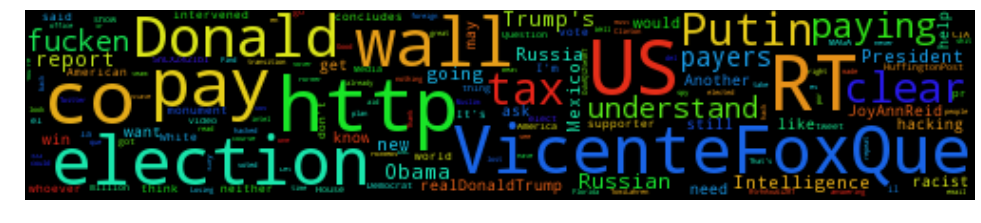

In [77]:
wordcloud = WordCloud(max_font_size=40, width = 500, height = 100, stopwords=stop,
                     ).generate(st)
plt.figure(figsize=(17,27))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [35]:
print (count_all.most_common(5))

[('Trump', 347), ('pay', 61), ('US', 58), ('election', 47), ('wall', 46)]


In [32]:
word_freq = count_all.most_common(20)
labels, freq = zip(*word_freq)
height = np.arange(len(labels))
word_freq

[('Trump', 296),
 ('Donald', 49),
 ('Meryl', 26),
 ('Streep', 22),
 ('book', 21),
 ('pick', 21),
 ('inauguration', 21),
 ('Sessions', 20),
 ('says', 20),
 ('Monica', 18),
 ('CNN', 17),
 ('37', 16),
 ('people', 16),
 ('en', 15),
 ('This', 14),
 ('#Trump', 14),
 ('Obama', 14),
 ('A', 14),
 ('approval', 13),
 ('que', 13)]

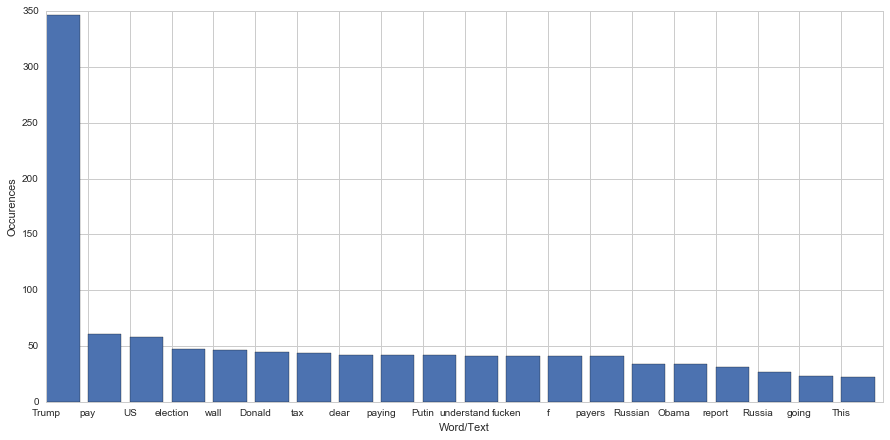

In [37]:
plt.figure(figsize=(15,7))
plt.bar(height, freq)
plt.xticks(height, labels)
plt.ylabel("Occurences")
plt.xlabel("Word/Text")
plt.show()

In [34]:
#Bigrams -- Terms adjacent to each other that occur frequently
with open('python.json', 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        if "text" in tweet:
            terms = [term for term in tk.tokenize(tweet['text']) if term not in stop and not term.startswith('http') and not term.startswith('@')]
            term_pairs = bigrams(terms)
            count_all.update(term_pairs)
    print (count_all.most_common(20))

[(('Donald', 'Trump'), 30), (('pick', 'Monica'), 18), (('Trump', 'pick'), 17), (('Meryl', 'Streep'), 17), (('Rebecca', 'Ferguson'), 11), (('Monica', "Crowley's"), 10), (('Donald', 'inauguration'), 10), (("Crowley's", 'book'), 9), (('pulls', 'Trump'), 9), (('next', 'week'), 9), (('inauguration', 'next'), 9), (("won't", 'singing'), 9), (('Ferguson', "won't"), 9), (('singing', 'Donald'), 9), (('Mr', 'Trump'), 9), (('finds', '50'), 8), (('Monica', 'Crowley'), 8), (('Publisher', 'pulls'), 8), (('Jeff', 'Sessions'), 8), (('IN', 'Publisher'), 8)]


In [36]:
#Co-Occurences (Within Tweets)
com = defaultdict(lambda: defaultdict(int))
with open('python.json', 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        if "text" in tweet:
            terms = [term for term in tk.tokenize(tweet['text']) if term not in stop and not term.startswith('http') and not term.startswith('@')]
            for i in range(len(terms)-1):
                for j in range (i+1, len(terms)):
                    t1, t2 = sorted([terms[i],terms[j]])
                    if t1 != t2:
                        com[t1][t2] += 1

In [38]:
#Extract 5 most common co-occurences
com_max = []
for t1 in com:
    t1_max_term = sorted(com[t1].items(), key = operator.itemgetter(1), reverse=True)[:5]
    for t2, t2_count in t1_max_term:
        com_max.append(((t1,t2), t2_count))
terms_max = sorted(com_max, key = operator.itemgetter(1), reverse= True)
print (terms_max[:5])

[(('Donald', 'Trump'), 32), (('Meryl', 'Trump'), 21), (('book', 'pick'), 20), (('Trump', 'says'), 20), (('Trump', 'pick'), 20)]


In [57]:
#Co-Occurences with external word
search_word = 'election'  #ENTER SEARCH WORD HERE
with open('python.json', 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        terms = [term for term in tk.tokenize(tweet['text']) if term not in stop and not term.startswith('http') and not term.startswith('@')]
        if search_word in terms:
            count_all.update(terms)
    print (count_all.most_common(5))

[('election', 47), ('Trump', 40), ('report', 20), ('help', 16), ('Putin', 16)]


In [63]:
"""
Sentiment Analysis: Extracting subjective information by means of text mining.

Collect -> Preprocess/Tokenize -> Basic Visualization -> Analyse -> Future Course of Action

Limitations of PMI based Approach: The semantic scores are calculated on terms, meaning that there is no notion of 
“entity” or “concept” or “event”. For example, it would be nice to aggregate and normalise all the references to the 
team names, e.g. #ita, Italy and Italia should all contribute to the semantic orientation of the same entity. 
Some aspects of natural language are also not captured by this approach, more notably modifiers and negation: 
how do we deal with phrases like not bad (this is the opposite of just bad) or very good (this is stronger than 
just good)?

"""
number_of_tweets_collected = 618 #From python.json

In [64]:
p_term = {}
p_com_terms = defaultdict(lambda : defaultdict(int))

for term, n in count_all.items():
    p_term[term] = n/number_of_tweets_collected
    for t2 in com[term]:
        p_com_terms[term][t2] = com[term][t2]/number_of_tweets_collected

In [65]:
positive_vocab = [
    'good', 'nice', 'Great', 'awesome', 'outstanding','fair'
    'fantastic', 'terrific', ':)', ':-)', 'like', 'love' 
]
negative_vocab = [
    'bad', 'terrible', 'crap', 'useless', 'hate', ':(', ':-(', 'wall','fucken','russia','pay'
]

In [73]:
PMI = defaultdict(lambda: defaultdict(int))

for t1 in p_term:
    for t2 in com[t2]:
        deno = p_term[t1] * p_term[t2]
        p_fin = p_com_terms[t1][t2]/deno
        PMI[t1][t2] = math.log2(p_fin if p_fin>0 else 1)

SO = {} #Semantic Orientation
for t1 in p_term.items():
    pos = sum(PMI[t1][tp] for tp in positive_vocab)
    neg = sum(PMI[t1][tn] for tn in negative_vocab)
    SO[t1] = pos - neg

In [75]:
semantic_sorted = sorted(SO, key=operator.itemgetter(1), reverse=True)
top_pos = semantic_sorted[:5]
top_neg = semantic_sorted[-5:]

print(top_pos)

[('Trump', 0.5614886731391586), ('pay', 0.09870550161812297), ('US', 0.09385113268608414), ('election', 0.07605177993527508), ('wall', 0.0744336569579288)]
